In [1]:
import pandas as pd
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline  
%autosave 300

Autosaving every 300 seconds


In [2]:
pd.options.display.max_columns = None
feature_names =defaultdict(lambda:'None')

In [3]:
drought_data=pd.read_csv('data/Drought Data.csv')
flood_data=pd.read_csv('data/Flood Data.csv')
heat_data=pd.read_csv('data/Heat Data.csv')
historical=pd.read_csv('data/Historical Hazards Outcome Data.csv')
risk_recovery=pd.read_csv('data/Overall Risk & Readiness Scores.csv')
sea_level_data=pd.read_csv('data/Sea Level Rise Data.csv')



In [119]:
df=sea_level_data.copy()
df.shape
#Counter(df['Historical Average Cost of Cold Event'])


(278, 14)

Index(['City', 'State', 'Geo.ID', 'Risk', 'Vulnerability', 'Exposure',
       'Sensitivity', 'Adaptive Capacity', 'Readiness', 'Social', 'Governance',
       'Economic', 'SLR in 2040', 'Projected Cost 1ft SLR'],
      dtype='object')


Index(['city', 'state', 'geo_id', 'sea_rise_risk', 'sea_rise_vuln',
       'sea_rise_expos', 'sea_rise_sens', 'sea_rise_adapt', 'sea_rise_ready',
       'sea_rise_social', 'sea_rise_gov', 'sea_rise_econ', 'sea_rise2040',
       'sea_rise_cost+1ft'],
      dtype='object')

In [131]:
df.corr()

,Risk,Vulnerability,Exposure,Sensitivity,Adaptive Capacity,Readiness,Social,Governance,Economic,SLR in 2040,Projected Cost 1ft SLR
Risk,1.000000,0.366257,0.937649,0.166752,-0.328135,-0.118572,-0.112318,-0.190651,0.071191,0.269155,0.300734
Vulnerability,0.366257,1.000000,0.019988,0.501656,-0.812920,-0.404371,-0.357799,-0.464209,-0.037974,0.171787,-0.023187
Exposure,0.937649,0.019988,1.000000,-0.022597,-0.038260,-0.019283,-0.045993,-0.075648,0.087349,0.226873,0.333509
Sensitivity,0.166752,0.501656,-0.022597,1.000000,0.095988,-0.185947,-0.158871,-0.229581,-0.009856,0.065485,-0.017332
Adaptive Capacity,-0.328135,-0.812920,-0.038260,0.095988,1.000000,0.340103,0.304745,0.379581,0.037059,-0.162074,0.016388
Readiness,-0.118572,-0.404371,-0.019283,-0.185947,0.340103,1.000000,0.737024,0.737184,0.616328,-0.316579,0.090192
Social,-0.112318,-0.357799,-0.045993,-0.158871,0.304745,0.737024,1.000000,0.388960,0.074208,-0.424358,0.018495
Governance,-0.190651,-0.464209,-0.075648,-0.229581,0.379581,0.737184,0.388960,1.000000,0.232172,-0.160976,0.053084
Economic,0.071191,-0.037974,0.087349,-0.009856,0.037059,0.616328,0.074208,0.232172,1.000000,0.016955,0.113935
SLR in 2040,0.269155,0.171787,0.226873,0.065485,-0.162074,-0.316579,-0.424358,-0.160976,0.016955,1.000000,0.041044


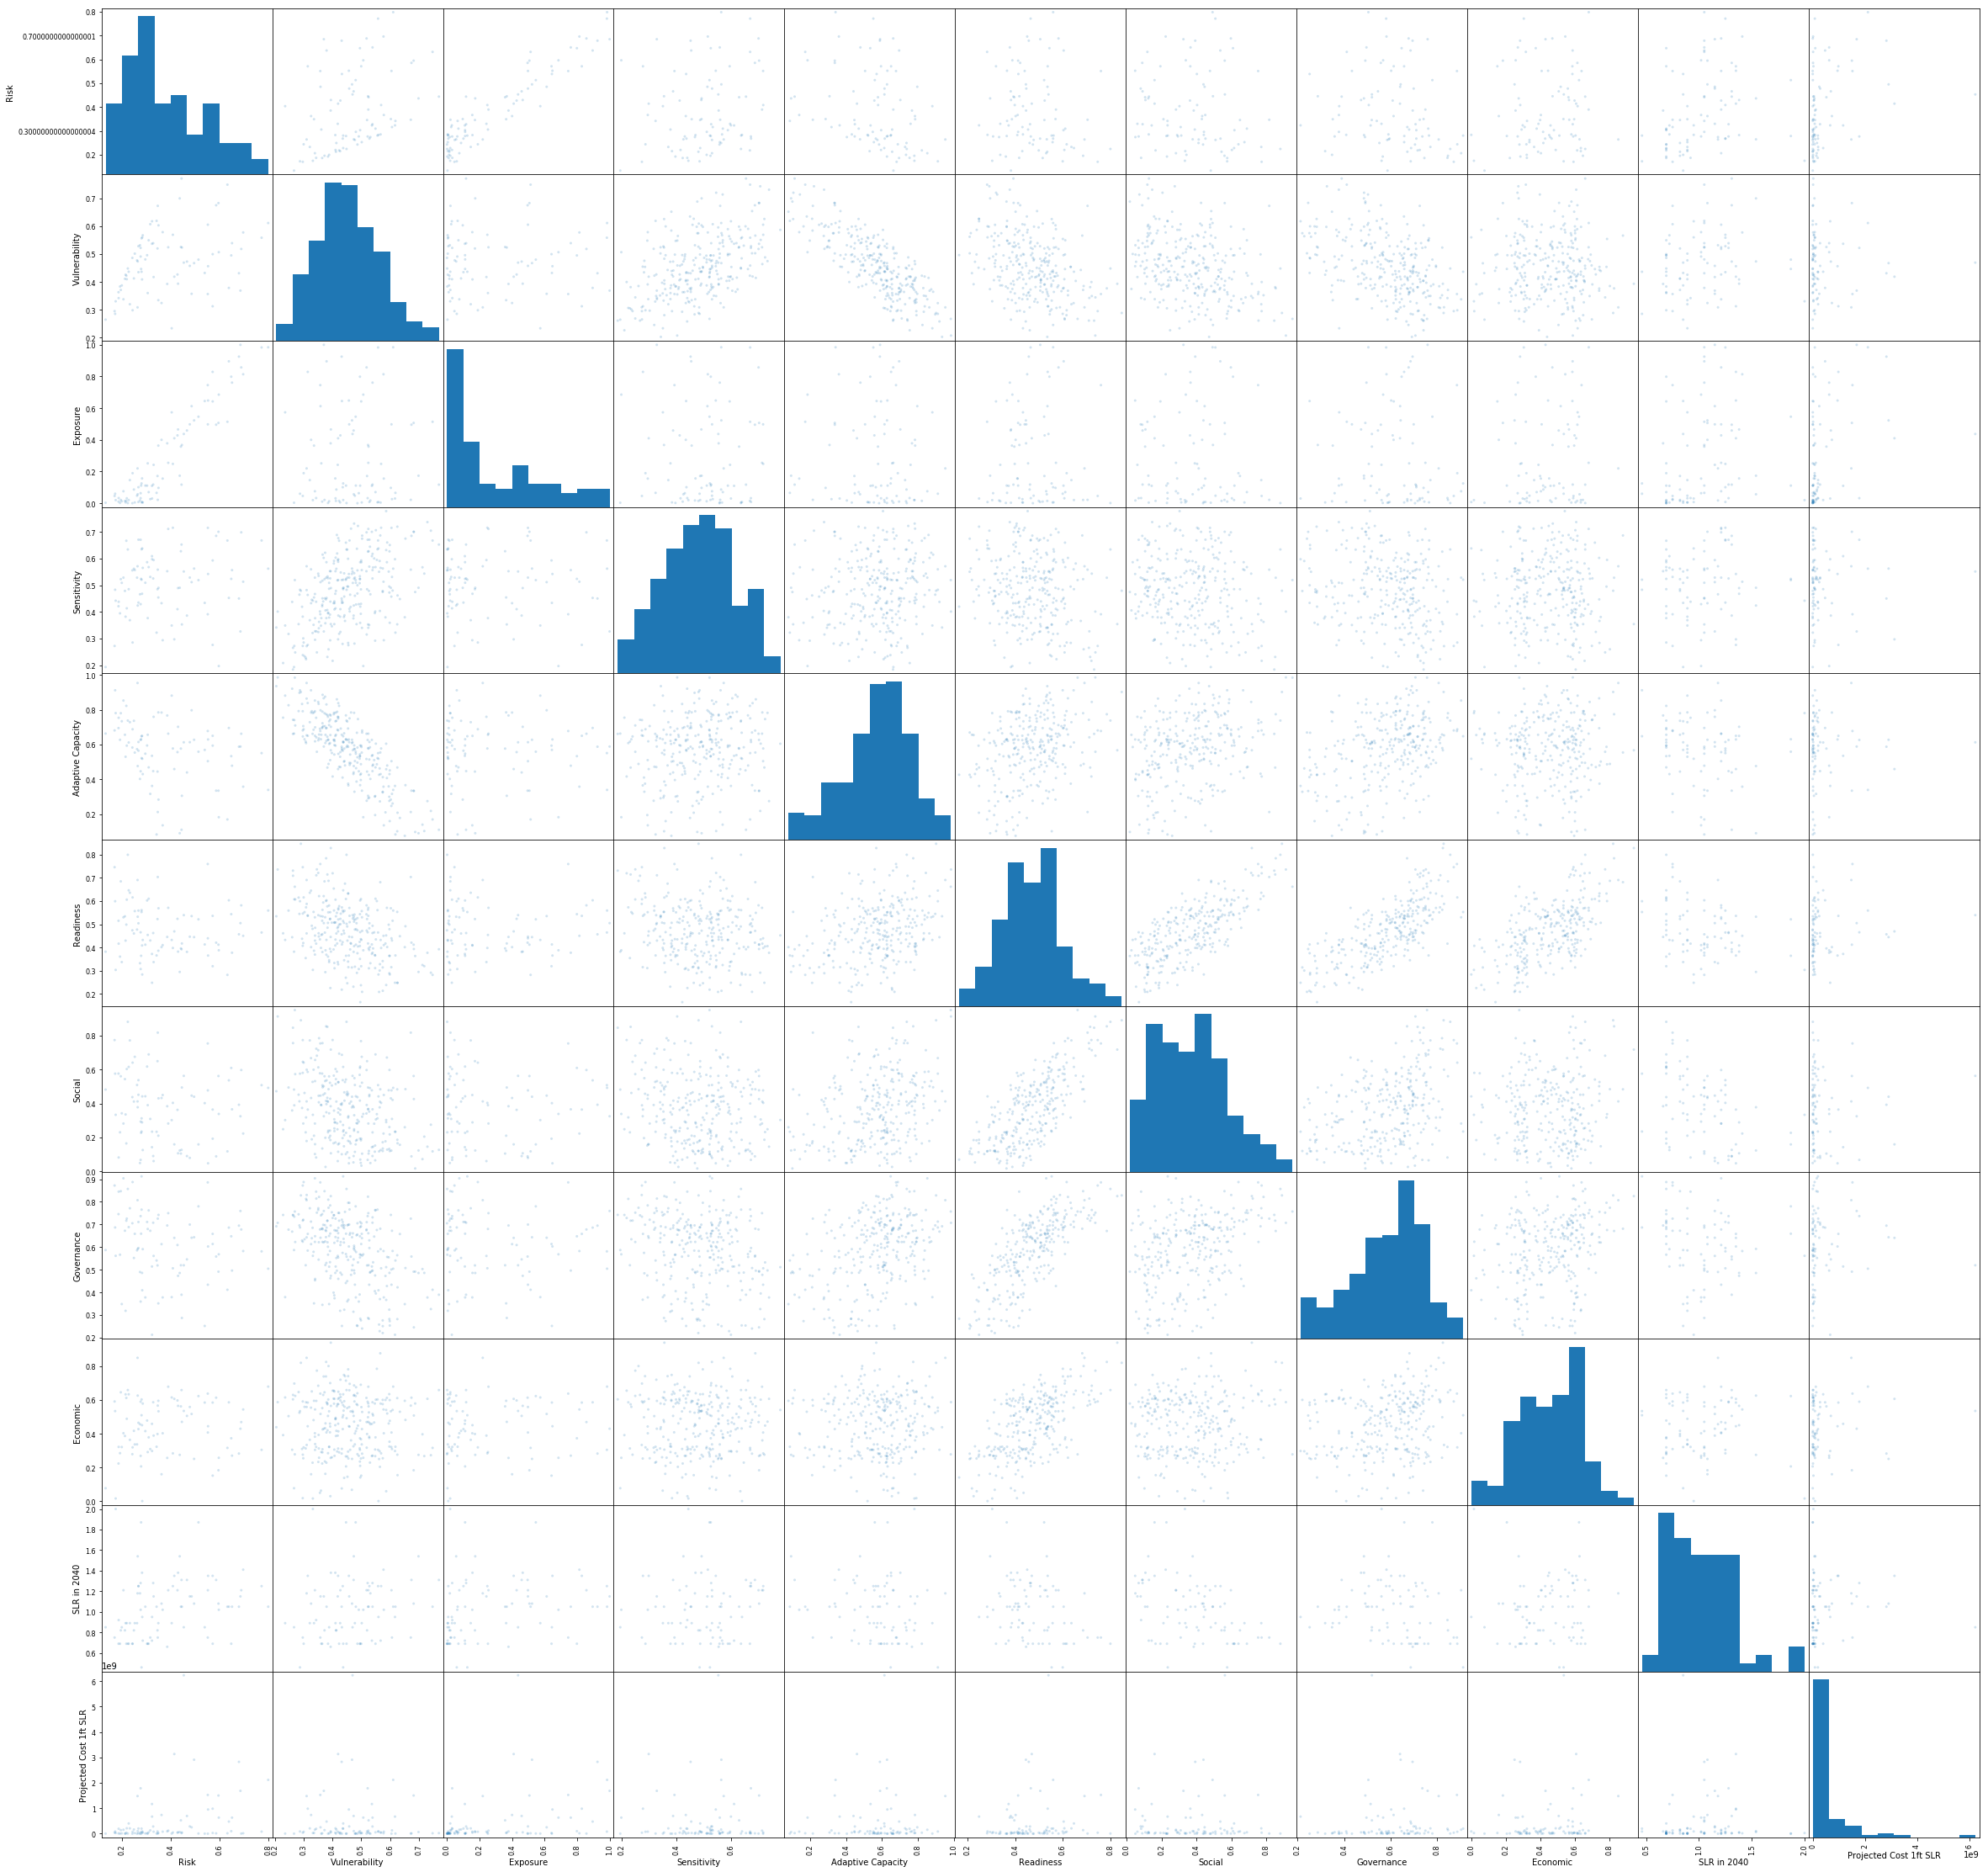

In [132]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(40,40))

plt.show()

In [133]:
output=df.describe()
#output.to_csv('cold_data')
output

,Risk,Vulnerability,Exposure,Sensitivity,Adaptive Capacity,Readiness,Social,Governance,Economic,SLR in 2040,Projected Cost 1ft SLR
count,87.000000,278.000000,87.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,85.000000,8.500000e+01
mean,0.379602,0.453249,0.289318,0.479530,0.573032,0.471330,0.372489,0.586881,0.454621,1.027294,4.392393e+08
std,0.160921,0.110293,0.299538,0.129059,0.191706,0.125325,0.202898,0.156369,0.180363,0.299720,9.315046e+08
min,0.133983,0.203220,0.000024,0.184152,0.076710,0.164831,0.018305,0.213018,0.000000,0.460000,0.000000e+00
25%,0.263383,0.376700,0.031351,0.383547,0.465666,0.388328,0.200324,0.490569,0.306635,0.820000,1.607580e+07
50%,0.329982,0.446055,0.155484,0.482635,0.596377,0.465124,0.366909,0.620818,0.469878,1.050000,7.809660e+07
75%,0.481455,0.526162,0.497788,0.565031,0.699849,0.551589,0.504821,0.698243,0.591855,1.210000,2.862356e+08
max,0.797835,0.770810,1.000000,0.778482,0.985425,0.846282,0.949099,0.912531,0.940881,2.000000,6.233847e+09


In [9]:
df.columns

Index(['City', 'State', 'Geo.ID', 'Flood Instances', 'Flood Injuries Direct',
       'Flood Injuries Indirect', 'Total Flood Injuries',
       'Flood Deaths Direct', 'Flood Deaths Indirect', 'Total Flood Deaths0',
       'Flood Damage', 'Heat Instances', 'Heat Injuries Direct',
       'Heat Injuries Indirect', 'Total Heat Injuries', 'Heat Deaths Direct',
       'Heat Deaths Indirect', 'Total Heat Deaths', 'Heat Damage',
       'Cold Instances', 'Cold Injuries Direct', 'Cold Injuries Indirect',
       'Total Cold Injuries', 'Cold Deaths Direct', 'Cold Deaths Indirect',
       'Total Cold Deaths', 'Cold Damage', 'Coastal Flood Instances',
       'Coastal Flood Injuries Direct', 'Coastal Flood Injuries Indirect',
       'Total Coastal Flood Injuries', 'Coastal Flood Deaths Direct',
       'Coastal Flood Deaths Indirect', 'Total Coastal Flood Deaths',
       'Coastal Flood Damage'],
      dtype='object')

In [134]:
a=3
df.iloc[:,a].describe()
#charles=(df.iloc[:,a])
#print(df.iloc[20:150,a])
#print(df.iloc[24])

count    87.000000
mean      0.379602
std       0.160921
min       0.133983
25%       0.263383
50%       0.329982
75%       0.481455
max       0.797835
Name: Risk, dtype: float64

In [114]:
df.iloc[:,a].unique()


array([ 0, 37,  1])

df1 = df[df.isna().any(axis=1)]
print(df1)

In [116]:
#print(df['flood_hist_cost'].isna())
#df.fillna(0, inplace = True)
row=0
count=0
for value in df.iloc[:,a]:
    if value >0:
        print(df.iloc[row,0:2],df.iloc[row,a])
        
        count+=1
    row+=1
print(count)

City     Baltimore
State           MD
Name: 17, dtype: object 10000
City     Boston 
State         MA
Name: 26, dtype: object 2176012
City     Burlington
State            VT
Name: 31, dtype: object 186919
City     Chesapeake
State            VA
Name: 44, dtype: object 285000
City     Chicago
State         IL
Name: 46, dtype: object 300000
City     Corpus Christi
State                TX
Name: 60, dtype: object 9346
City     Everett
State         WA
Name: 80, dtype: object 18274
City     Hampton
State         VA
Name: 103, dtype: object 1795
City     Kent
State      WA
Name: 125, dtype: object 24280
City     Newport News
State              VA
Name: 165, dtype: object 206601
City     Norfolk
State         VA
Name: 166, dtype: object 1510000
City     Philadelphia
State              PA
Name: 188, dtype: object 100000
City     Port St. Lucie
State                FL
Name: 194, dtype: object 840514
City     Portland
State          ME
Name: 195, dtype: object 64489
City     Seattle
State       

city_indicators=pd.read_csv('data/City Indicators.csv')
city_indicators_old=df.columns
new_names=['city','state','geo_id','GDP_water_all','perc_fff','d_plan','w_plan','base_w_stress','invest','tax_break','corruption','perc_vote','innovate','climate_real','hs_ed','pop_dens','w_quality','debt','flood_pop','flood_build','flood_car','impervious','beds_1000','alone_65','child_5','health_ins','older_1999','mobile_home','rent_50plus','trees','heating','disabled','poverty','older_1979','work_outside','no_car','pop_under_1ft','pop_under_3ft','impact_plus1ft','impact_plus3ft', 'col_empty','lat','long','county','region','city_km2','pop_2010','pop_2011','pop_2012','pop_2013','pop_2014','pop_2015','median_income']
indicators_dict = dict(zip(new_names, city_indicators_old))
city_indicators.columns = new_names
city_indicators.drop(columns =['col_empty'], inplace= True)

feature_names['city_indicators']=indicators_dict

city_indicators.columns

fig = plt.figure()

count=1
drop_list=list(city_indicators.columns)
for header in city_indicators.columns:
    x=city_indicators[header]
    for header2 in drop_list:
        plt.show(count)
        y=city_indicators[header2]
        ax = fig.add_subplot()
        plt.scatter(x, y, alpha=0.5)
        
        drop_list.remove(header2)
        count+=1

In [118]:
flood_data=pd.read_csv('data/Flood Data.csv')
flood_data_old=df.columns
new_names=['city', 'state','geo_id','flood_risk','flood_vuln','flood_expose','flood_sens','flood_adapt','flood_ready','flood_social','flood_gov','flood_econ','flood_hist_cost','flood_future_cost','flood_prob_2040','flood_prob_2019_40']
flood_data.columns = new_names


flood_dict = dict(zip(new_names, flood_data_old))
feature_names['flood']=flood_dict

In [36]:
cold_data=pd.read_csv('data/Cold Data.csv')
cold_data_old=df.columns
new_names=['city', 'state', 'geo_id', 'cold_risk', 'cold_vuln', 'cold_expose','cold_sens', 'cold_adapt', 'cold_ready', 'cold_social', 'cold_govG','cold_econ', 'cold_hist_cost', 'cold_p_heat2040']
cold_data.columns = new_names


cold_dict = dict(zip(new_names, cold_data_old))
feature_names['cold_data']=cold_dict
#cold_data.head()

In [ ]:
risk_recovery=pd.read_csv('data/Overall Risk & Readiness Scores.csv')
risk_recovery_old=risk_recovery.columns
new_names=['city', 'state', 'geo_id','overall_risk', 'overall_readiness']
risk_recovery.columns = new_names


risk_recovery_dict = dict(zip(new_names, risk_recovery_old))
feature_names['risk_recovery']=risk_recovery_dict


In [ ]:
drought_data=pd.read_csv('data/Drought Data.csv')
drought_data.drop(columns=['Unnamed: 14'], inplace=True)
old_columns=drought_data.columns
new_names=['city', 'state', 'geo_id','drought_risk', 'drought_vuln', 'drought_expose','drought_sens', 'drought_adapt', 'drought_ready', 'drought_social', 'drought_gov','drought_econ', 'drought_hist_cost','drought_future_cost','drt_dev_forecast','drt_dev_for_vs_norm','drt_.5sdev_G','drt_.5sdev_G','drt_dist_sdev']
drought_data.columns = new_names


drought_dict = dict(zip(new_names, old_columns))
feature_names['drought_data']=drought_dict
feature_names

In [ ]:
heat_data=pd.read_csv('data/Heat Data.csv')
new_names=['city','state','geo_id','heat_risk','heat_vuln','heat_expose','heat_sens','heat_adapt','heat_ready','heat_social','heat_gov','heat_econ','heat_hist_cost','heat_prob_2040']
old_columns=heat_data.columns
heat_data.columns = new_names

heat_data_dict = dict(zip(new_names, old_columns))
feature_names['heat_data']=heat_data_dict
df.head()

In [ ]:
historical=pd.read_csv('data/Historical Hazards Outcome Data.csv')
new_names=['city', 'state', 'geo_id','fl_instances', 'fl_inj_direct' 
           ,'fl_inj_indirect','fl_inj_total'\
           , 'fl_death_direct' ,'fl_death_indirect','fl_death_total',
           'flood_damage'\
           ,'ht_instances', 'ht_inj_direct' ,'ht_inj_indirect','ht_inj_total'\
           , 'ht_death_direct' ,'ht_death_indirect','ht_death_total','heat_damage'\
          ,'cld_instances', 'cld_inj_direct' ,'cld_inj_indirect','cld_inj_total'\
           ,'cld_death_direct' ,'cld_death_indirect','cld_death_total','cold_damage'\
           ,'coast_fl_instances', 'coast_fl_inj_direct' ,'coast_fl_inj_indirect','coast_fl_inj_total'\
           , 'coast_fl_death_direct' ,'coast_fl_death_indirect','coast_fl_death_total','coast_fl_damage']
 
old_columns=historical.columns
historical.columns = new_names
historical_dict = dict(zip(new_names, old_columns))
feature_names['historical']=historical_dict
#historical.columns

In [130]:
sea_level_data=pd.read_csv('data/Sea Level Rise Data.csv')
new_names=['city', 'state', 'geo_id', 'sea_rise_risk', 'sea_rise_vuln', 'sea_rise_expos',
       'sea_rise_sens', 'sea_rise_adapt', 'sea_rise_ready', 'sea_rise_social', 'sea_rise_gov',
       'sea_rise_econ', 'sea_rise2040', 'sea_rise_cost+1ft']

old_columns=sea_level_data.columns
sea_level_data.columns = new_names
sea_level_data_dict = dict(zip(new_names, old_columns))
feature_names['sea_level_data']=sea_level_data_dict
sea_level_data.columns

Index(['City', 'State', 'Geo.ID', 'Risk', 'Vulnerability', 'Exposure',
       'Sensitivity', 'Adaptive Capacity', 'Readiness', 'Social', 'Governance',
       'Economic', 'SLR in 2040', 'Projected Cost 1ft SLR'],
      dtype='object')


Index(['city', 'state', 'geo_id', 'sea_rise_risk', 'sea_rise_vuln',
       'sea_rise_expos', 'sea_rise_sens', 'sea_rise_adapt', 'sea_rise_ready',
       'sea_rise_social', 'sea_rise_gov', 'sea_rise_econ', 'sea_rise2040',
       'sea_rise_cost+1ft'],
      dtype='object')